<a href="https://colab.research.google.com/github/RohanMali2003/Bone-Fracture-Detection-Prediction/blob/main/Bone_Fracture_Prediction_%26_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
import zipfile
import os

zip_path = "/content/archive (3).zip"  # Change this to your actual file name
extract_path = "/content/BoneFracturedataset"  # Change this if needed

# Create directory if not exists
os.makedirs(extract_path, exist_ok=True)

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed!")

Extraction completed!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import os

Preparing the Data

In [ ]:
path=os.listdir('/content/BoneFracturedataset/BoneFractureDataset/training')
classes={'fractured':0,'not_fractured':1}


In [ ]:
import cv2

In [ ]:
X=[]
Y=[]
for cls in classes:
    pth='/content/BoneFracturedataset/BoneFractureDataset/training/' + cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j,0)
        img=cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
X=np.array(X)
Y=np.array(Y)

Counts of fractured and unfractured bones

In [ ]:
pd.Series(Y).value_counts()


,count
0,4480
1,4383


In [ ]:
X.shape

(8863, 200, 200)

In [ ]:
X_updated=X.reshape(len(X),-1)
X_updated.shape

(8863, 40000)

Splitting the data


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X_updated,Y,random_state=10,test_size=.20)

In [ ]:

xtrain=xtrain/255
xtest=xtest/255


Applying Logistic regression first


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings('ignore')
lg=LogisticRegression(C=0.1)
lg.fit(xtrain,ytrain)

LogisticRegression(C=0.1)

In [ ]:
print("Testing Score:",lg.score(xtrain,ytrain))
print("Testing Score:",lg.score(xtest,ytest))

Testing Score: 0.9258110014104373
Testing Score: 0.817258883248731


In [ ]:
sv=SVC()
sv.fit(xtrain,ytrain)

SVC()

In [ ]:
print("Testing Score:",sv.score(xtrain,ytrain))
print("Testing Score:",sv.score(xtest,ytest))

Testing Score: 0.9679830747531735
Testing Score: 0.9396503102086858


In [ ]:
pred=sv.predict(xtest)
np.where(ytest!=pred)

(array([   6,   25,   75,   79,   92,  104,  111,  132,  149,  161,  173,
         180,  189,  204,  226,  234,  238,  245,  250,  259,  296,  307,
         330,  357,  366,  374,  383,  397,  427,  449,  510,  515,  536,
         539,  554,  582,  594,  626,  633,  645,  653,  707,  713,  714,
         735,  782,  793,  819,  860,  864,  885,  915,  929,  961,  962,
         985, 1009, 1011, 1012, 1021, 1028, 1043, 1071, 1073, 1086, 1130,
        1133, 1140, 1164, 1171, 1178, 1186, 1210, 1213, 1233, 1246, 1261,
        1298, 1310, 1341, 1352, 1362, 1392, 1401, 1419, 1425, 1428, 1437,
        1456, 1461, 1497, 1521, 1523, 1528, 1533, 1575, 1576, 1605, 1608,
        1609, 1614, 1644, 1678, 1701, 1715, 1720, 1742]),)

Testing the model


In [ ]:

dec={0:"fractured",1:"not_fractured"}

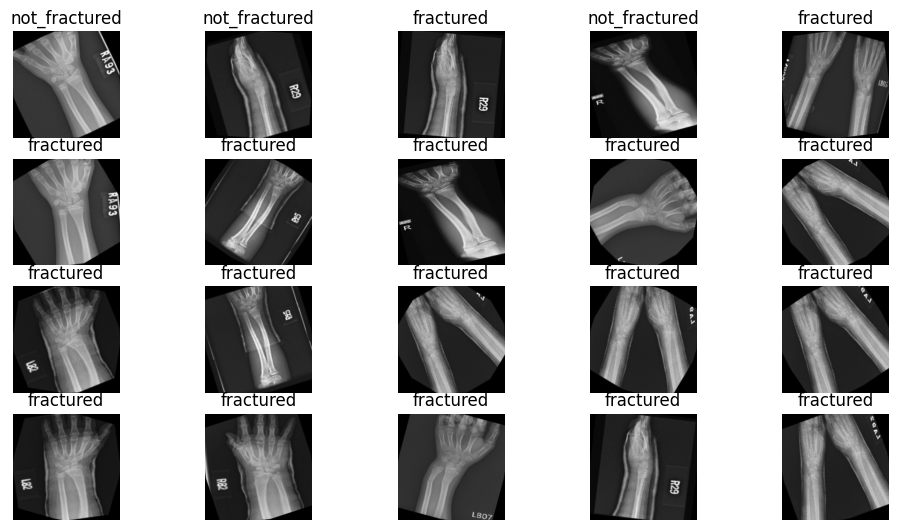

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/BoneFracturedataset/BoneFractureDataset/testing')
c=1
for i in os.listdir('/content/BoneFracturedataset/BoneFractureDataset/testing/fractured/')[:20]:
  plt.subplot(5,5,c)

  img=cv2.imread('/content/BoneFracturedataset/BoneFractureDataset/testing/fractured/'+i,0)
  img1=cv2.resize(img,(200,200))
  img1=img1.reshape(1,-1)/255
  p=sv.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

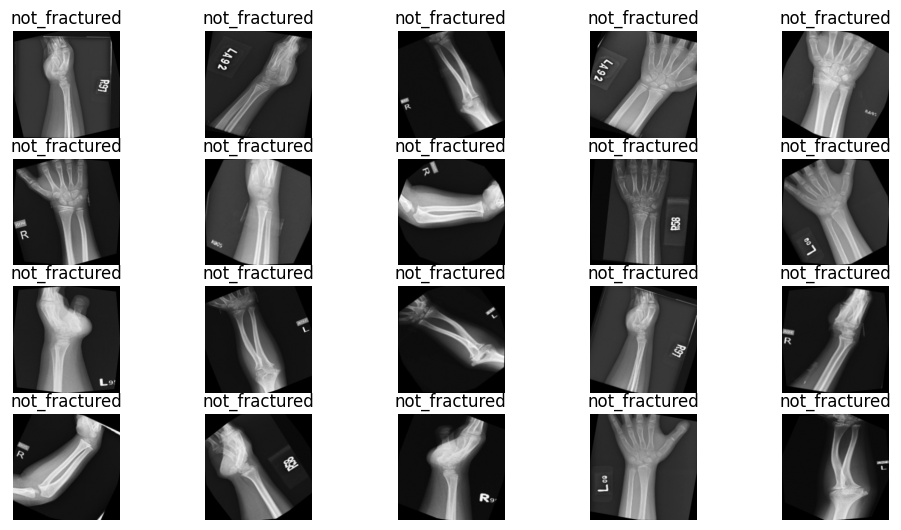

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir('/content/BoneFracturedataset/BoneFractureDataset/training')
c=1
for i in os.listdir('/content/BoneFracturedataset/BoneFractureDataset/training/not_fractured/')[:20]:
  plt.subplot(5,5,c)

  img=cv2.imread('/content/BoneFracturedataset/BoneFractureDataset/training/not_fractured/'+i,0)
  img1=cv2.resize(img,(200,200))
  img1=img1.reshape(1,-1)/255
  p=sv.predict(img1)
  plt.title(dec[p[0]])
  plt.imshow(img,cmap='gray')
  plt.axis('off')
  c+=1

In [ ]:
import random
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
import numpy as np
import os

# Load Pretrained MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

feature_extractor = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract features
def extract_features(img_path):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    features = feature_extractor.predict(img_array)  # Extract features
    return features.flatten()  # Convert to 1D vector

# Extract features from a limited number of images
X = []
Y = []
dataset_path = "/content/BoneFracturedataset/BoneFractureDataset/training/"
num_samples_per_class = 200  # Adjust this number to limit images per class

for cls in ["fractured", "not_fractured"]:
    class_path = os.path.join(dataset_path, cls)
    all_images = os.listdir(class_path)

    # Randomly sample images
    selected_images = random.sample(all_images, min(num_samples_per_class, len(all_images)))

    for img_name in selected_images:
        img_path = os.path.join(class_path, img_name)
        feature_vector = extract_features(img_path)
        X.append(feature_vector)
        Y.append(0 if cls == "fractured" else 1)  # 0: Fractured, 1: Non-Fractured

X = np.array(X)
Y = np.array(Y)

print("Feature Extraction Complete! Shape:", X.shape)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [ ]:
# Load full MobileNetV2 model (fix input shape)
model = MobileNetV2(weights="imagenet", include_top=True, input_shape=(224, 224, 3))


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load Pretrained MobileNetV2 (this time with classification layers)
model = MobileNetV2(weights="imagenet", include_top=True, input_shape=(224, 224, 3))

# Get the last convolutional layer
last_conv_layer = model.get_layer("Conv_1")  # Last Conv layer in MobileNetV2

# Create a new model that maps the input image to the last conv layer + predictions
grad_model = Model(inputs=model.input, outputs=[last_conv_layer.output, model.output])

print("Grad-CAM Model Loaded Successfully!")


Grad-CAM Model Loaded Successfully!


In [ ]:
import tensorflow as tf

def get_gradcam_heatmap(model, img_array, class_index=None):
    """
    Generates a Grad-CAM heatmap for a given image.

    Parameters:
        model: Trained CNN model
        img_array: Preprocessed image array (shape: (1, 224, 224, 3))
        class_index: The class for which Grad-CAM should be computed
                     (Default: model's predicted class)

    Returns:
        heatmap: The computed heatmap
    """
    grad_model = Model(
        inputs=model.input,
        outputs=[model.get_layer("Conv_1").output, model.output]
    )

    # Compute gradients
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if class_index is None:
            class_index = np.argmax(predictions[0])  # Default to predicted class
        loss = predictions[:, class_index]

    # Compute gradients of the loss w.r.t. the last conv layer
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))  # Global average pooling

    # Weight conv layer outputs by the computed gradients
    conv_outputs = conv_outputs[0]
    heatmap = np.zeros(shape=conv_outputs.shape[:2])

    for i in range(conv_outputs.shape[-1]):
        heatmap += pooled_grads[i] * conv_outputs[:, :, i]

    heatmap = np.maximum(heatmap, 0)  # ReLU
    heatmap /= np.max(heatmap)  # Normalize
    return heatmap


In [ ]:
def preprocess_image(img_path):
    """
    Loads and preprocesses an image for Grad-CAM.

    Parameters:
        img_path: Path to the image file.

    Returns:
        img_array: Preprocessed image (ready for model prediction).
    """
    img = load_img(img_path, target_size=(224, 224))  # Resize to 224x224
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array


In [ ]:
def display_gradcam(img_path, model, class_index=None):
    """
    Applies Grad-CAM to an image and visualizes the heatmap.

    Parameters:
        img_path: Path to the image.
        model: Trained model for prediction.
        class_index: Optional. Specific class to visualize (default: predicted class).
    """
    img_array = preprocess_image(img_path)  # Preprocess image
    heatmap = get_gradcam_heatmap(model, img_array, class_index)  # Generate Grad-CAM heatmap

    # Load original image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (OpenCV loads images in BGR)
    img = cv2.resize(img, (224, 224))  # Resize to match model input size

    # Apply heatmap
    heatmap = cv2.resize(heatmap, (224, 224))  # Resize heatmap to match original image
    heatmap = np.uint8(255 * heatmap)  # Convert to 0-255 scale
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)  # Apply color map

    # Overlay heatmap on original image
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)

    # Display images
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(heatmap)
    plt.title("Grad-CAM Heatmap")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(superimposed_img)
    plt.title("Overlayed Image")
    plt.axis("off")

    plt.show()


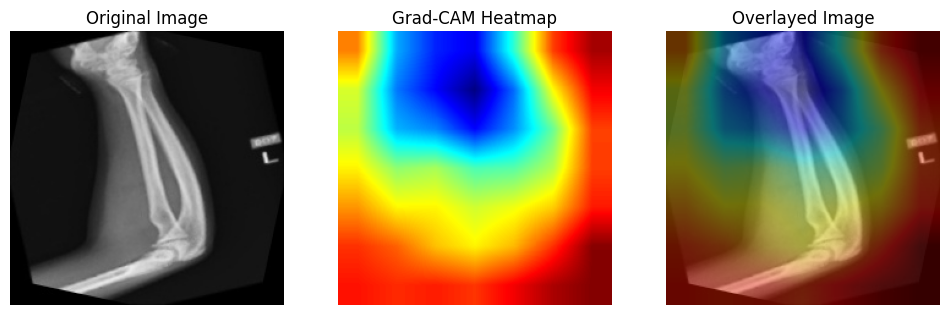

In [ ]:
# Provide the path to an image from your dataset
sample_img_path ="/content/BoneFracturedataset/BoneFractureDataset/training/not_fractured/10-rotated1-rotated1-rotated1-rotated1.jpg"

# Apply Grad-CAM
display_gradcam(sample_img_path, model)


In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Filter out only non-fractured bone features
X_non_fractured = X[Y == 1]  # Y==1 means non-fractured bones

# Normalize the features
scaler = StandardScaler()
X_non_fractured_scaled = scaler.fit_transform(X_non_fractured)

# Train One-Class SVM
svm_model = OneClassSVM(kernel="rbf", gamma="auto", nu=0.05)  # nu controls sensitivity to anomalies
svm_model.fit(X_non_fractured_scaled)

print("Anomaly detection model trained successfully!")


Anomaly detection model trained successfully!


In [ ]:
def detect_anomaly(feature_vector):
    """
    Checks if a bone feature is an anomaly (potential fracture risk).

    Parameters:
        feature_vector: Extracted features of the bone (1D array)

    Returns:
        "Normal" if inside the learned boundary, "Potential Fracture Risk" otherwise.
    """
    feature_vector_scaled = scaler.transform([feature_vector])  # Normalize
    prediction = svm_model.predict(feature_vector_scaled)  # Predict (-1 = anomaly, 1 = normal)

    if prediction[0] == -1:
        return "Potential Fracture Risk"
    else:
        return "Normal"

# Test on a new non-fractured bone/content/BoneFracturedataset/BoneFractureDataset/testing/not_fractured/1-rotated1-rotated1-rotated1-rotated1.jpg
test_img_path = "/content/BoneFracturedataset/BoneFractureDataset/testing/not_fractured/1-rotated1-rotated1-rotated1.jpg"
test_features = extract_features(test_img_path)  # Extract features

# Run anomaly detection
result = detect_anomaly(test_features)
print(f"Prediction for the test bone: {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Prediction for the test bone: Normal


In [ ]:
import os
import joblib

# Create models directory if it doesn't exist
os.makedirs('model_weights', exist_ok=True)

# Save SVC model
joblib.dump(sv, 'model_weights/svc_model.pkl')

# Save scaler for anomaly detection
joblib.dump(scaler, 'model_weights/scaler.pkl')

# Save anomaly detection model
joblib.dump(svm_model, 'model_weights/anomaly_model.pkl')

print("Models saved successfully to model_weights/ directory!")